<a href="https://colab.research.google.com/github/apchavezr/18.-Modelado-y-simulaci-n/blob/main/control_temperatura_bodega_hibrido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación de un sistema híbrido: Control de temperatura en una bodega

Este notebook presenta un modelo híbrido que combina dinámica continua (variación de temperatura) y eventos discretos (encendido/apagado del calefactor) para controlar la temperatura interior de una bodega.

**Ecuación diferencial del modelo continuo:**

$$\frac{dT}{dt}=-\alpha\left(T-T_{\mathrm{amb}}\right)+q\left(t\right)dt$$

donde:

- $T\left(t\right)$ es la temperatura interior en el tiempo t,
-	$T_{\mathrm{amb}}={10}^\circ$C es la temperatura ambiente,
-	$\alpha=0.1$ es el coeficiente de intercambio térmico,
-	$q\left(t\right)$ es el flujo de calor entregado por el calefactor (0 o 2 según el estado).


## Supuestos del modelo:
-	La temperatura ambiente es constante: 10 °C.
-	El coeficiente de intercambio térmico con el ambiente es: α = 0.1 min⁻¹.
-	El calefactor aporta un calor constante de q(t) = 2.0 °C/min cuando está encendido.
-	La calefacción se enciende si la temperatura cae por debajo de 18 °C y se apaga si supera los 22 °C.
-	El sistema inicia con una temperatura interior de 15 °C, con el calefactor encendido.
-	El tiempo simulado es de 200 minutos, con intervalos de observación uniformes.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [7]:
# Parámetros
T_amb = 10
alpha = 0.1
q_on = 2.0
q_off = 0.0
T_min = 18
T_max = 22

# Tiempo de simulación
t_span = (0, 200)
t_eval = np.linspace(*t_span, 1000)


## Definición del modelo híbrido
Incluye lógica discreta para activar o desactivar el calefactor y una ODE para modelar la temperatura.

In [3]:
def modelo_hibrido(t, T, estado):
    T_actual = T[0]
    calefactor_encendido = estado[0]

    if calefactor_encendido and T_actual >= T_max:
        calefactor_encendido = False
    elif not calefactor_encendido and T_actual <= T_min:
        calefactor_encendido = True

    q_t = q_on if calefactor_encendido else q_off
    dTdt = -alpha * (T_actual - T_amb) + q_t
    estado[0] = calefactor_encendido
    return [dTdt]

In [4]:
# Simulación paso a paso
T0 = [15.0]
estado = [True]
T_vals = []
estado_vals = []
T = T0

for t_i, t_f in zip(t_eval[:-1], t_eval[1:]):
    sol = solve_ivp(modelo_hibrido, (t_i, t_f), T, args=(estado,), t_eval=[t_f])
    T = sol.y[:, -1]
    T_vals.append(T[0])
    estado_vals.append(1 if estado[0] else 0)

T_vals = np.array(T_vals)
estado_vals = np.array(estado_vals)
t_vals = t_eval[1:]

## Visualización de resultados
La primera gráfica muestra la evolución de la temperatura interior. La segunda indica el estado del calefactor (encendido/apagado).

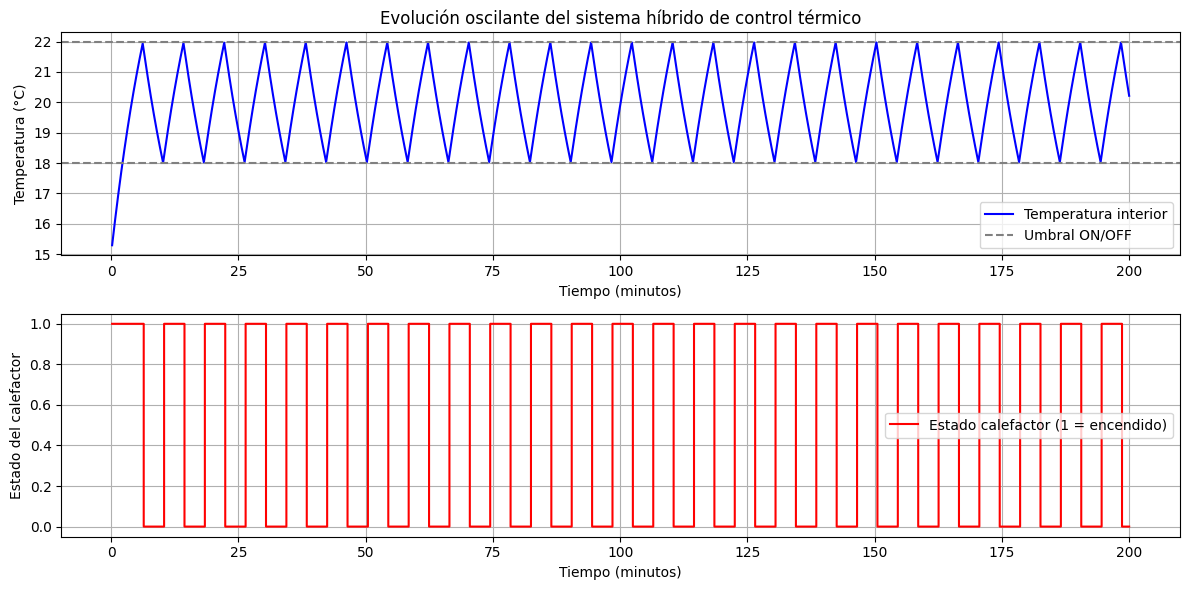

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t_vals, T_vals, label='Temperatura interior', color='blue')
plt.axhline(T_min, color='gray', linestyle='--', label='Umbral ON/OFF')
plt.axhline(T_max, color='gray', linestyle='--')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Temperatura (°C)')
plt.title('Evolución oscilante del sistema híbrido de control térmico')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.step(t_vals, estado_vals, where='post', color='red', label='Estado calefactor (1 = encendido)')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Estado del calefactor')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# ¿Qué muestra la simulación?

* Gráfico superior (azul): la temperatura interior sube y baja de manera cíclica, oscilando entre los umbrales de 18 °C y 22 °C.

* Gráfico inferior (rojo): representa el estado del calefactor, encendiéndose cuando la temperatura cae a 18 °C y apagándose al llegar a 22 °C.

Esta dinámica refleja un patrón de control por histéresis, típico en sistemas térmicos automatizados.

Este ejemplo evidencia la naturaleza híbrida del sistema: la temperatura cambia continuamente, pero el estado del calefactor cambia de forma discreta, provocando cambios abruptos en el valor de $q(t)$. La visualización de la simulación confirma el efecto del control sobre el equilibrio térmico de la bodega, mostrando cómo un sistema simple puede mantener condiciones internas dentro de un rango aceptable frente a condiciones ambientales fijas.